In [74]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.stats as stats
import sklearn.metrics as skm
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [75]:
# get wine data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data=pd.read_csv(url,sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [76]:
# remove outliers
data=data[data['total sulfur dioxide']<200]

In [77]:
# add a binary quality col

# Z Score normalization
colZScore=data.keys()
colZScore=colZScore.drop('quality')
data[colZScore]=data[colZScore].apply(stats.zscore)

data['binaryQuality']=0

data['binaryQuality'][data['quality']>5]=1

# data['boolQuality'] select the column boolQulaity from dataframe
# data['boolQuality'][boolean series] = 1 
# where the bool series is true we put 1 

data

/tmp/ipykernel_8977/3482238526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colZScore]=data[colZScore].apply(stats.zscore)
/tmp/ipykernel_8977/3482238526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binaryQuality']=0
/tmp/ipykernel_8977/3482238526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binaryQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217380,0.401792,-0.980138,-0.380922,0.052836,1.547828,-0.068233,-0.982759,0.899027,-0.462207,0.074599,5,0
1595,-1.389638,0.122359,-0.877216,-0.237608,-0.542132,2.218623,0.151778,-0.865964,1.353377,0.599872,0.732539,6,1
1596,-1.159961,-0.101187,-0.722834,-0.165951,-0.244648,1.260344,-0.193954,-0.536815,0.704305,0.540868,0.544556,6,1
1597,-1.389638,0.653281,-0.774295,-0.380922,-0.265897,1.547828,-0.068233,-0.680154,1.677912,0.304850,-0.207376,5,0


In [78]:
#another way using .loc
# data.loc[row_label(s), column_label(s)] = value


data.loc[:,colZScore]=data[colZScore].apply(stats.zscore)
data
data.loc[:,'binaryQuality']=0

data.loc[data['quality']>5,'binaryQuality']=1
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binaryQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217380,0.401792,-0.980138,-0.380922,0.052836,1.547828,-0.068233,-0.982759,0.899027,-0.462207,0.074599,5,0
1595,-1.389638,0.122359,-0.877216,-0.237608,-0.542132,2.218623,0.151778,-0.865964,1.353377,0.599872,0.732539,6,1
1596,-1.159961,-0.101187,-0.722834,-0.165951,-0.244648,1.260344,-0.193954,-0.536815,0.704305,0.540868,0.544556,6,1
1597,-1.389638,0.653281,-0.774295,-0.380922,-0.265897,1.547828,-0.068233,-0.680154,1.677912,0.304850,-0.207376,5,0


In [79]:
data['binaryQuality'].values
data['binaryQuality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: binaryQuality, Length: 1597, dtype: int64

In [80]:
print(colZScore)
print(colZScore.drop('density'))


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


In [81]:
dataT=torch.tensor(data[colZScore].values).float()
labelsT=torch.tensor(data['binaryQuality'].values).float()
labelsT=labelsT[:,None]




In [82]:
# TensorDatasets
train_data,test_data,train_labels,test_labels=train_test_split(dataT,labelsT,train_size=.8)
train_dataset=TensorDataset(train_data,train_labels)
test_dataset=TensorDataset(test_data,test_labels)
# DATALOADERS
train_loader=DataLoader(train_dataset,batch_size=16,shuffle=True,drop_last=True)
test_loader=DataLoader(test_dataset,batch_size=test_dataset.tensors[0].shape[0])

In [83]:
lengthOfInput=colZScore
len(lengthOfInput)

11

In [84]:
def createModal():

    class Net(nn.Module) :
        def __init__(self):
            super().__init__()
            self.input=nn.Linear(11,8)
            self.hidden=nn.Linear(8,8)
            self.output=nn.Linear(8,1)
        def forward(self,x):
            x=F.relu(self.input(x))
            x=F.relu(self.hidden(x))
            return self.output(x)
    net=Net()
    lossFunction=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.Adam(net.parameters(),lr=.1)
    return net,lossFunction,optimizer
            

In [85]:
def TrainModal():
    numEpochs=100
    net,lossFunction,optimizer=createModal()
    losses=[]
    for i in range(numEpochs):
        batchLoss=[]
        for X,y in train_loader:
            # forward prob
            yHat=net(X)
            # the BCE Binary cross entropy with logits which means it applys a sigmoid function on the raw output score/logits
            # print(yHat.shape)
            # losses calculation
            loss=lossFunction(yHat,y)
            print(loss)
            batchLoss.append(loss.detach().item())
            # backprob
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        losses.append(np.mean(batchLoss))
    return losses

        
losses=TrainModal()
type(losses)

tensor(0.7088, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6594, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6206, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6054, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7439, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5202, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3729, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7262, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7942, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5111, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5982, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(1.0215, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7038, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6113, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4910, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4297, grad_fn=<BinaryCrossEntro

list

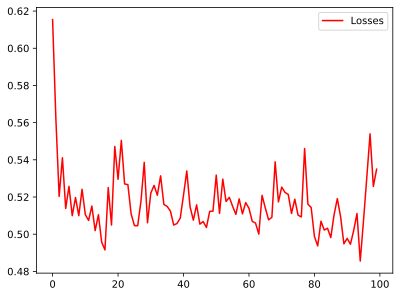

In [86]:
plt.plot(losses,'r-',label='Losses')
plt.legend()
plt.show()